In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('/Users/MVelam/Downloads/covid_19_data_cleaned.csv')

In [4]:
df.head(50)

,Date,Province/State,Country,Lat,Long,Confirmed,Recovered,Deaths,Active
0,2020-01-22,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
1,2020-01-23,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
2,2020-01-24,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
3,2020-01-25,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
4,2020-01-26,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
5,2020-01-27,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
6,2020-01-28,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
7,2020-01-29,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
8,2020-01-30,NaN,Afghanistan,33.93911,67.709953,0,0,0,0
9,2020-01-31,NaN,Afghanistan,33.93911,67.709953,0,0,0,0


In [5]:
df.drop(['Lat','Long'],axis=1,inplace=True)
df.rename(columns={'Province/State':'State'},inplace=True)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])


In [7]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [8]:
df3 = df2.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [9]:
df3.head(20)

,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
5,Afghanistan,2020-01-27,0,0,0
6,Afghanistan,2020-01-28,0,0,0
7,Afghanistan,2020-01-29,0,0,0
8,Afghanistan,2020-01-30,0,0,0
9,Afghanistan,2020-01-31,0,0,0


In [10]:
countries = df3['Country'].unique()
len(countries)

195

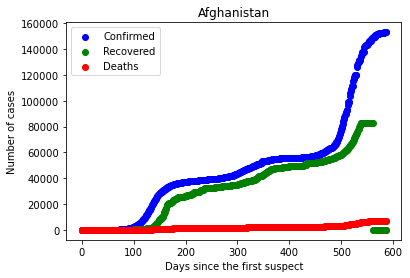

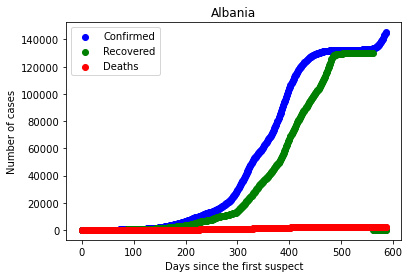

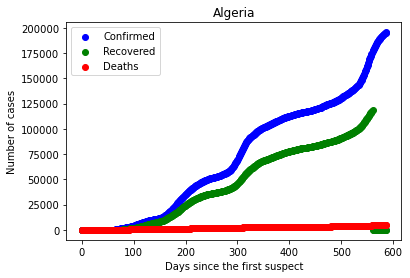

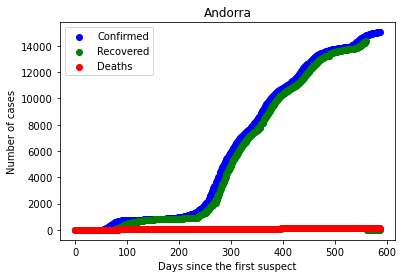

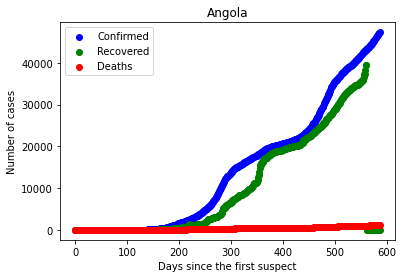

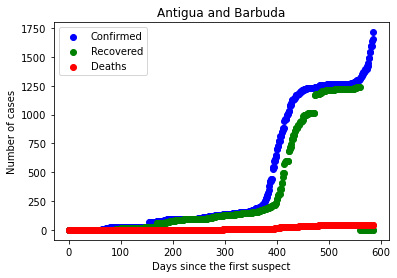

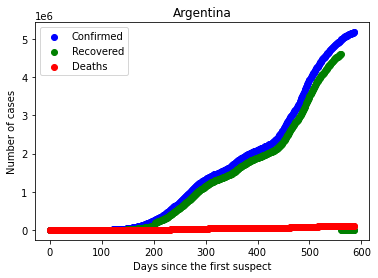

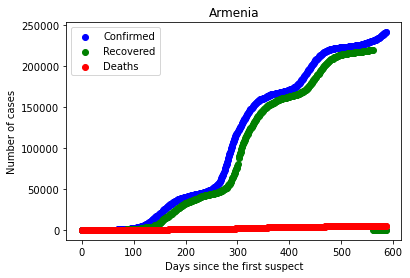

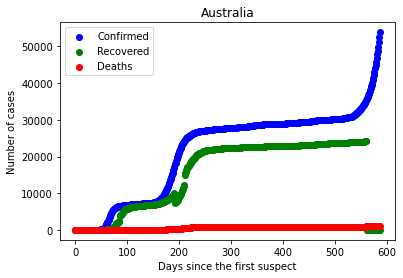

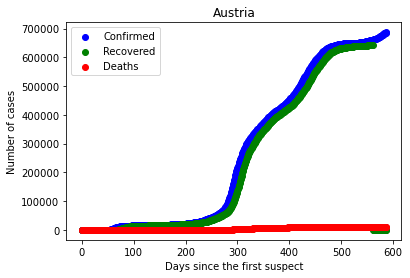

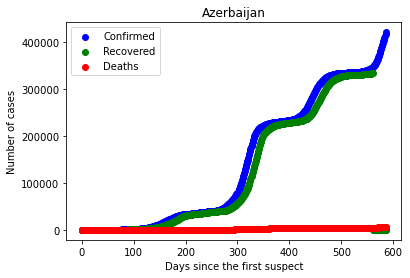

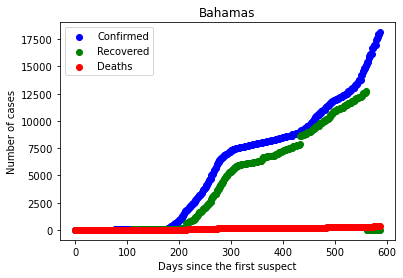

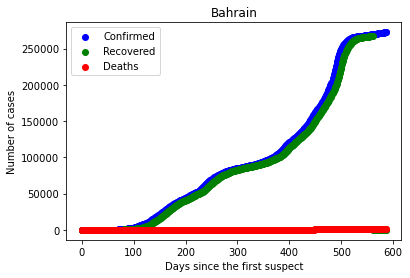

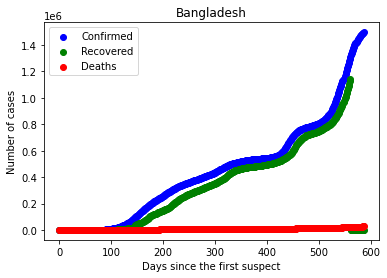

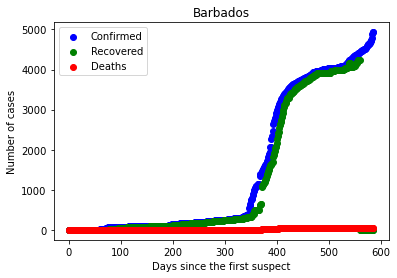

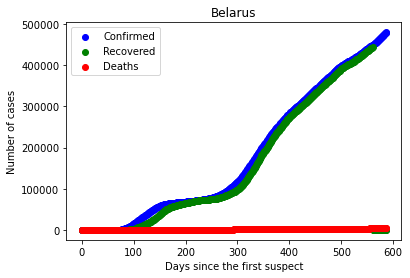

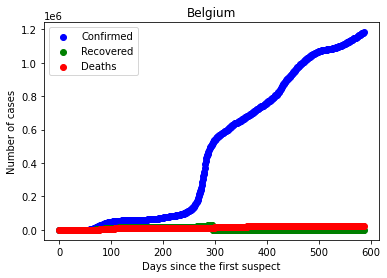

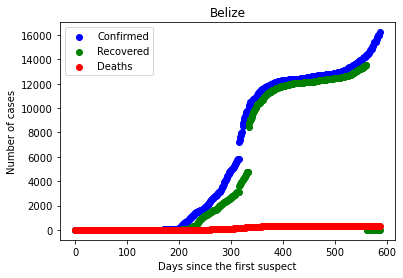

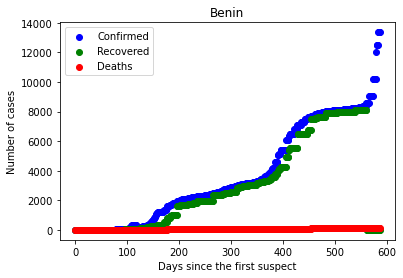

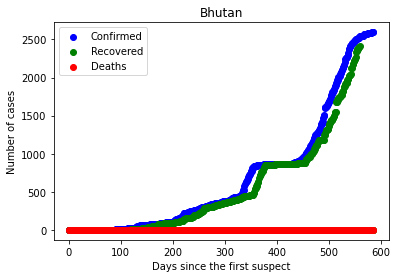

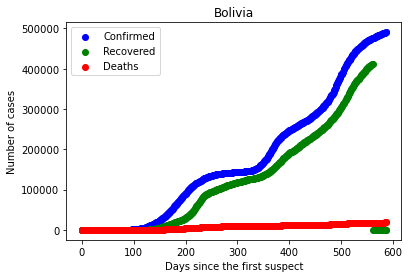

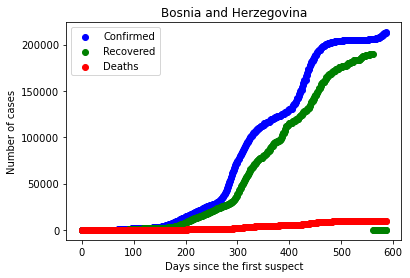

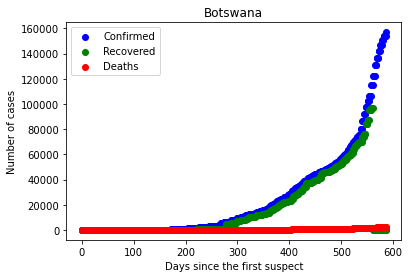

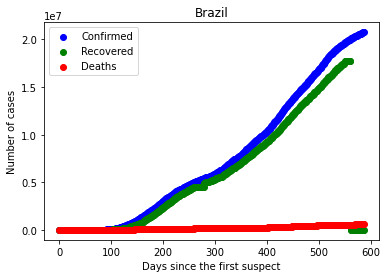

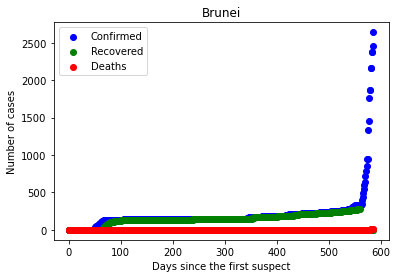

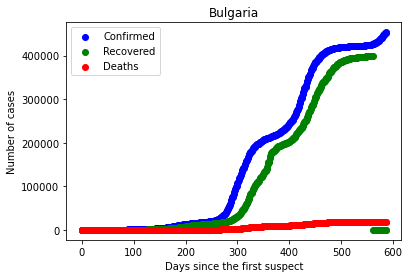

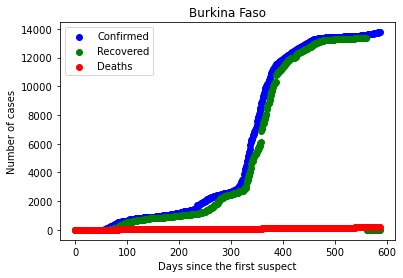

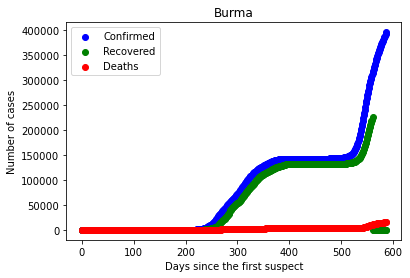

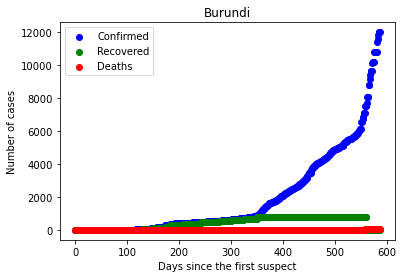

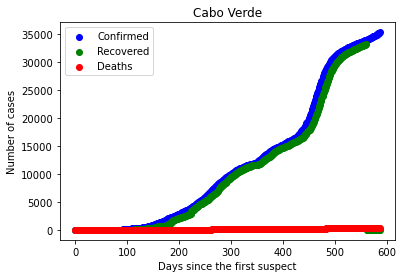

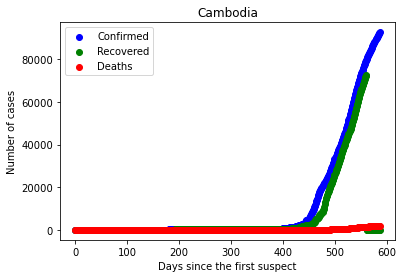

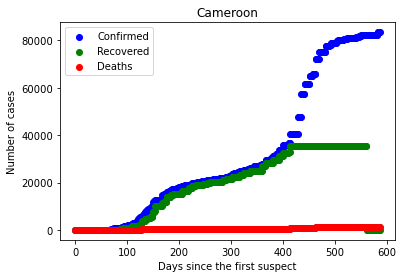

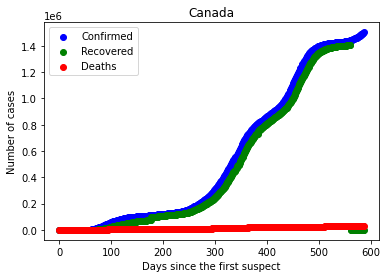

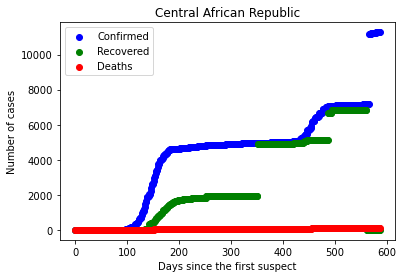

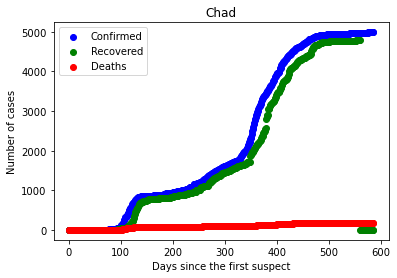

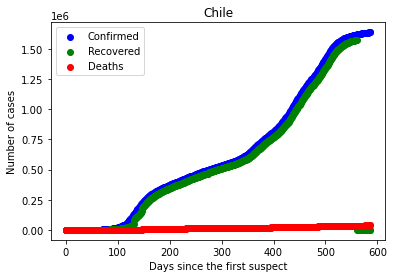

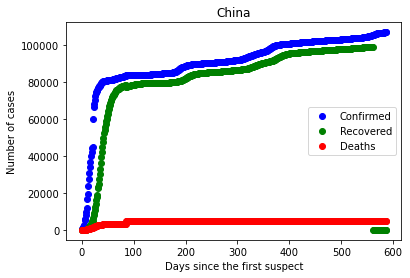

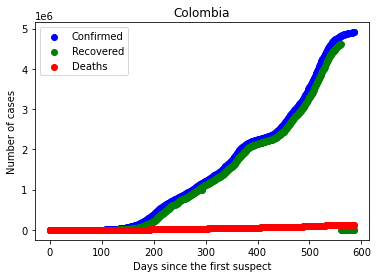

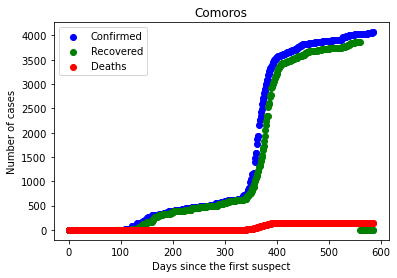

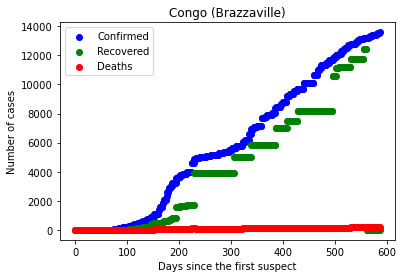

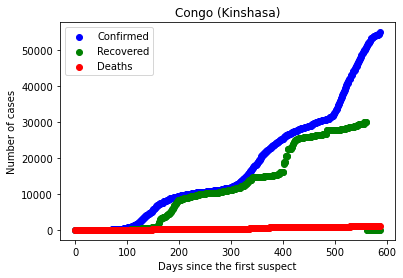

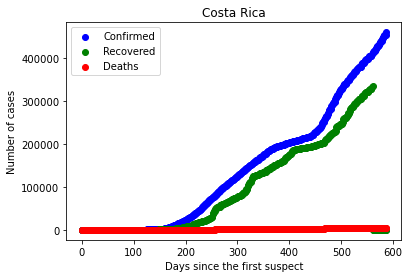

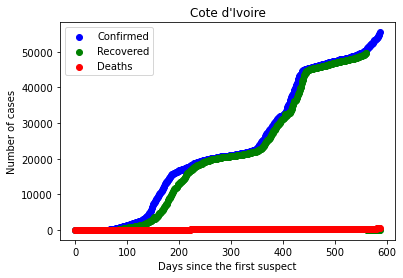

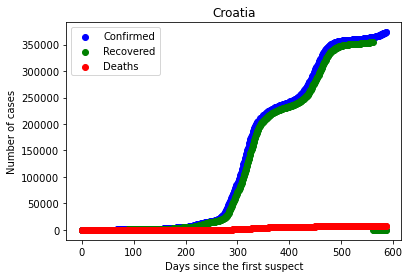

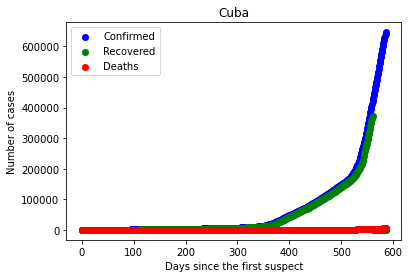

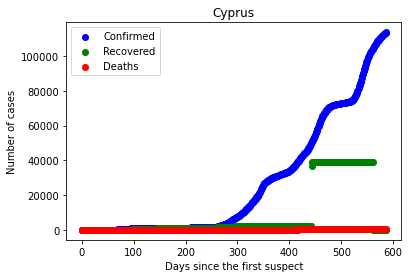

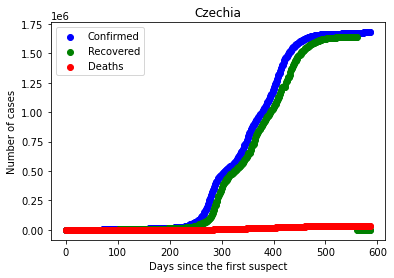

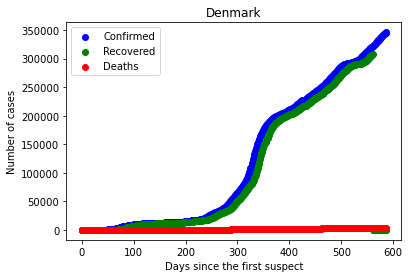

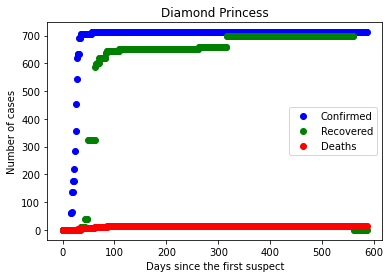

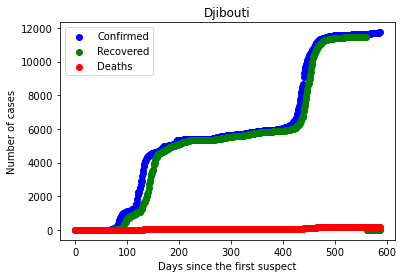

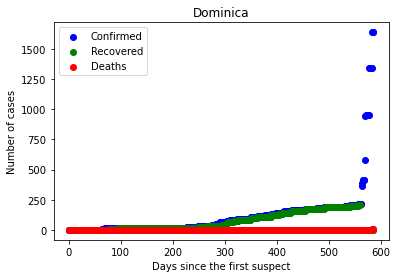

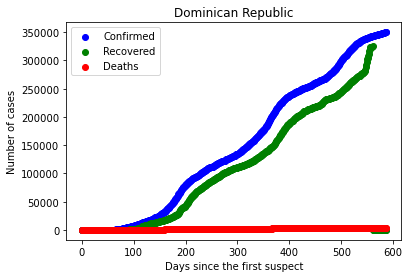

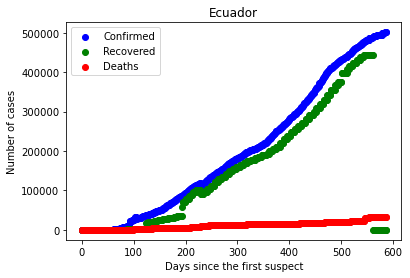

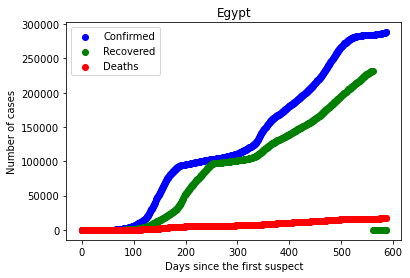

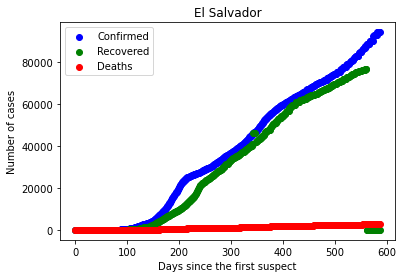

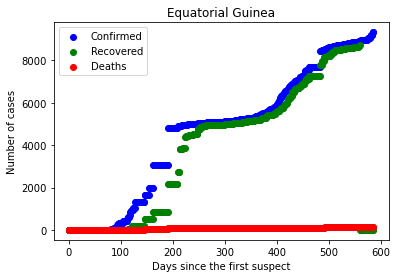

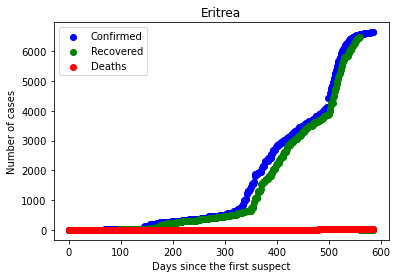

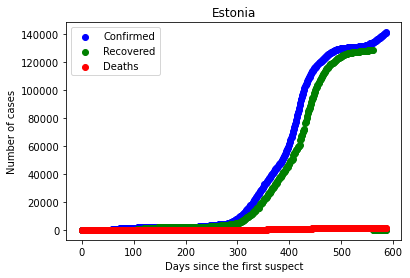

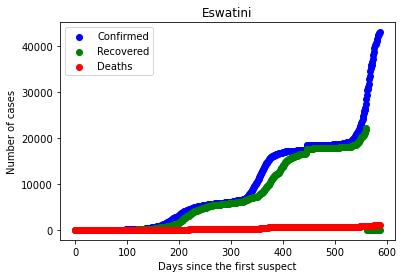

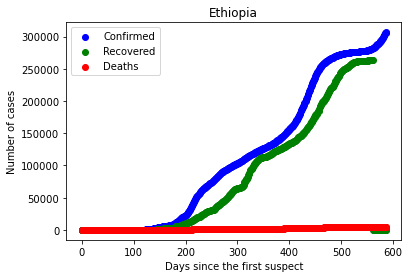

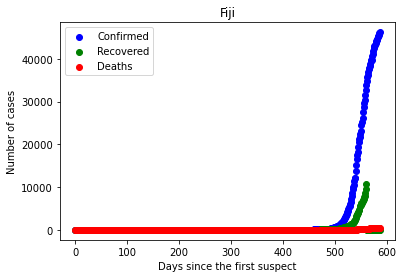

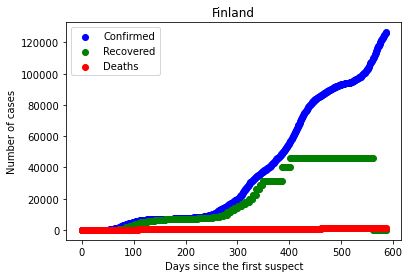

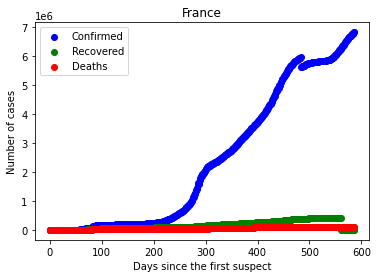

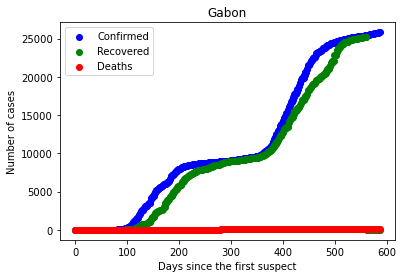

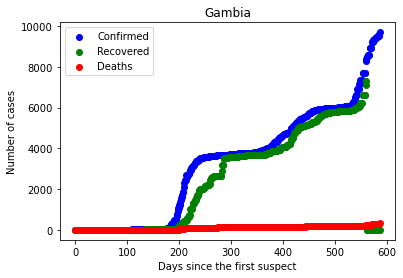

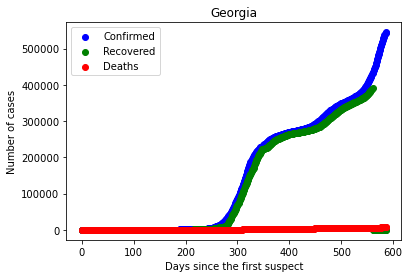

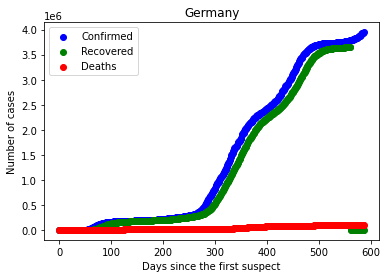

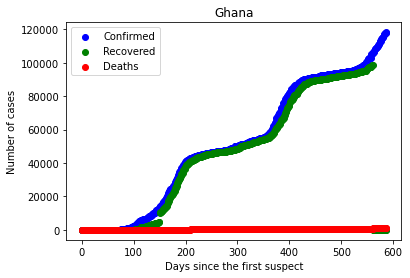

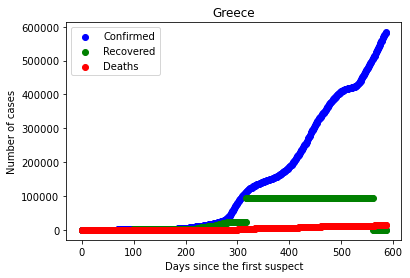

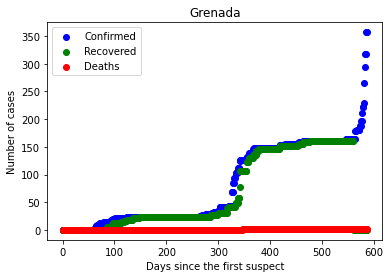

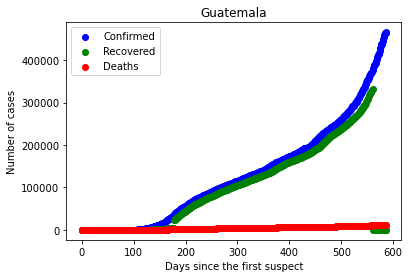

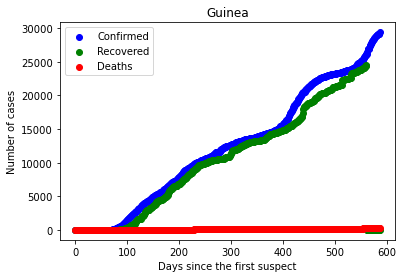

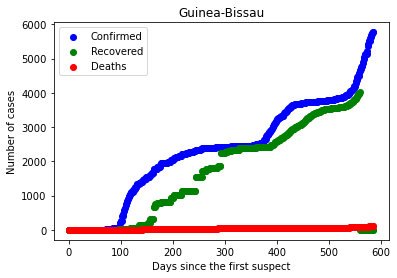

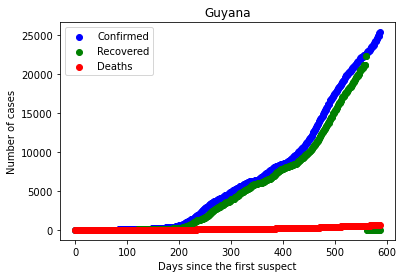

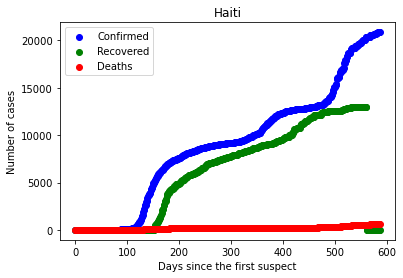

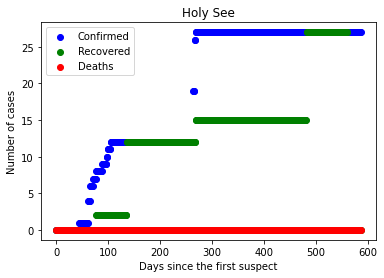

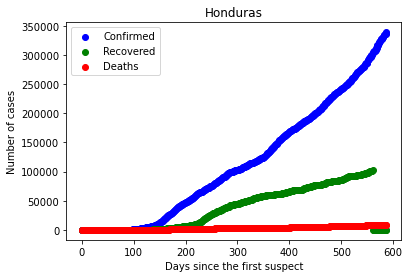

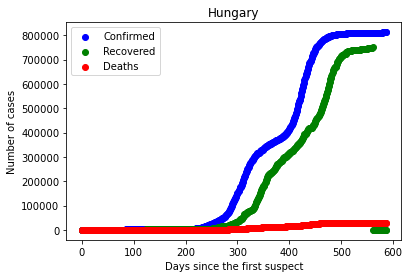

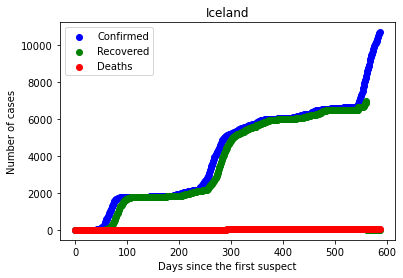

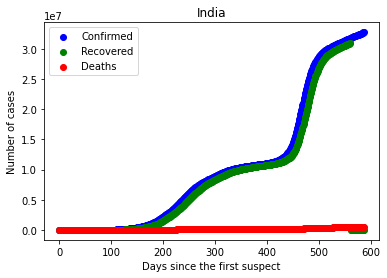

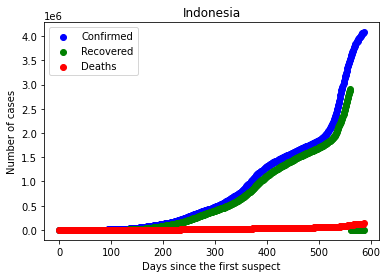

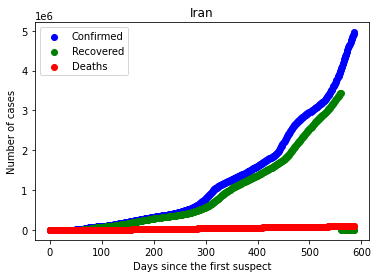

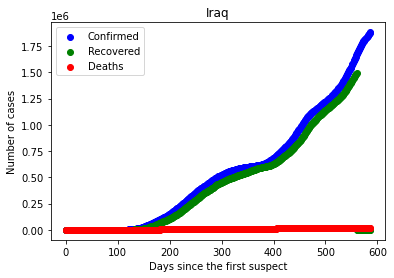

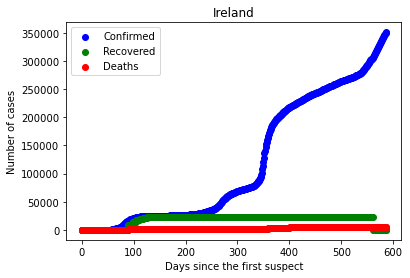

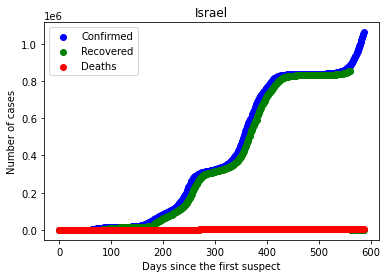

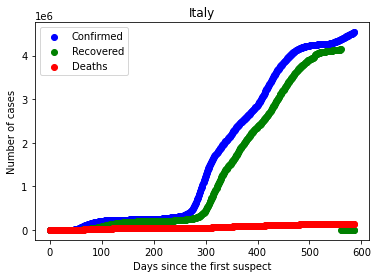

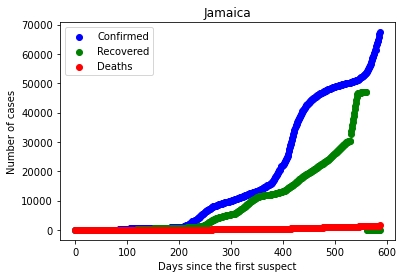

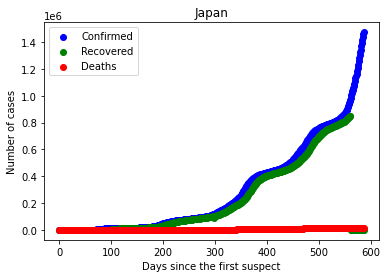

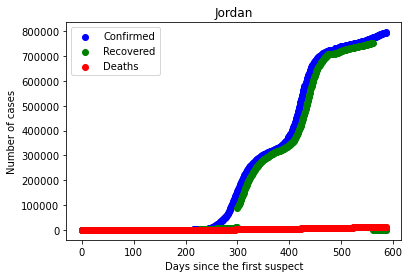

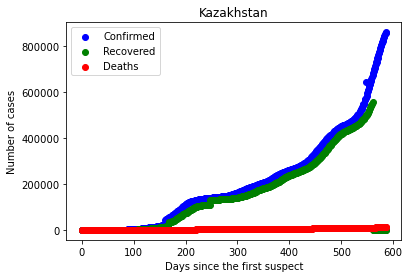

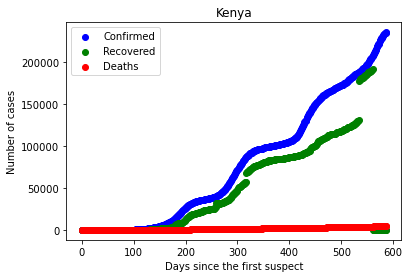

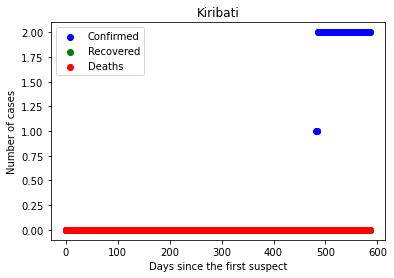

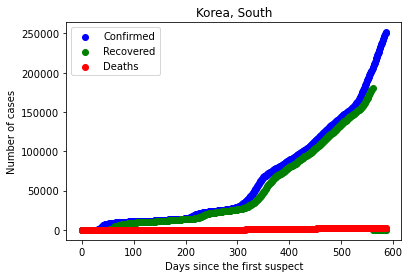

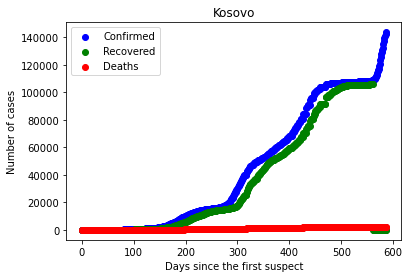

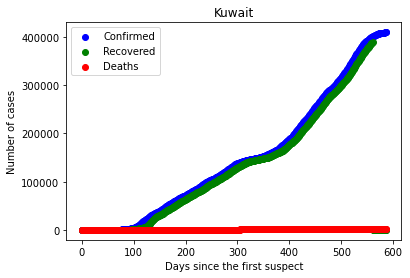

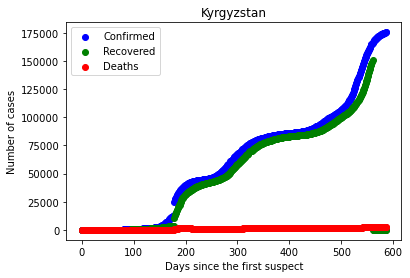

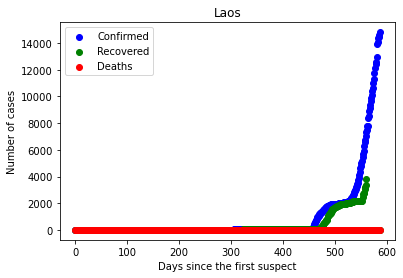

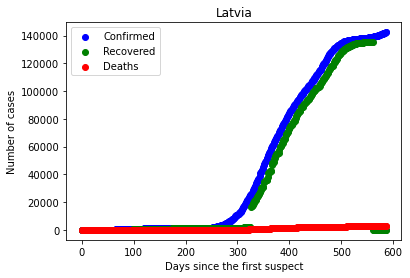

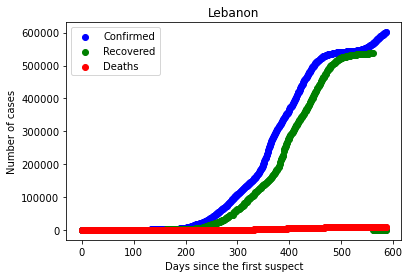

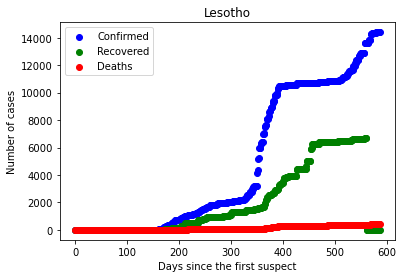

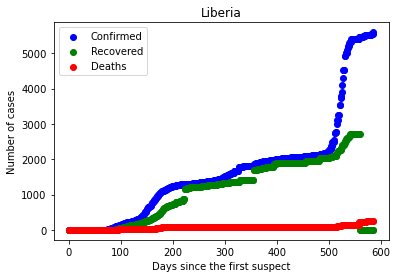

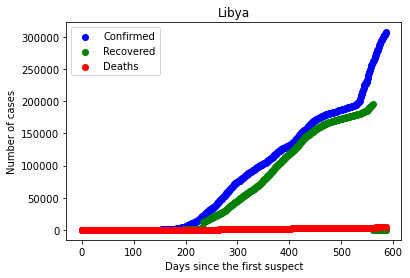

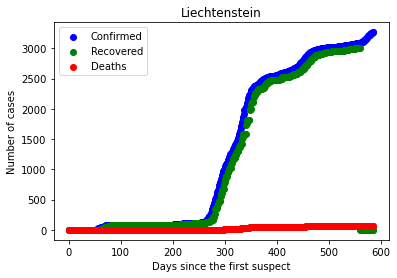

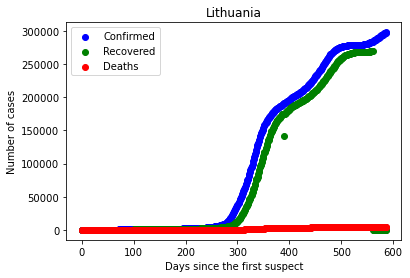

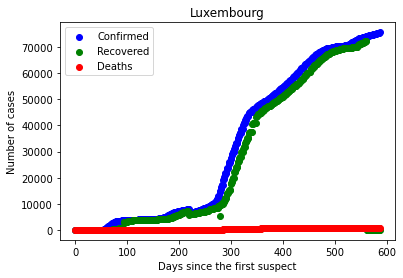

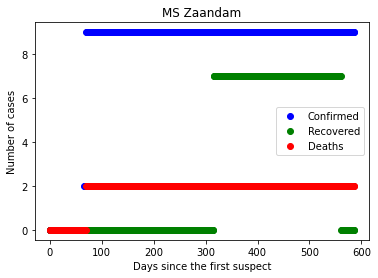

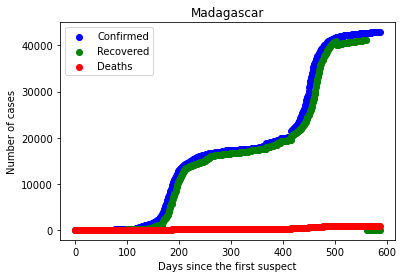

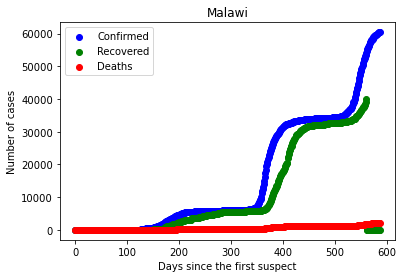

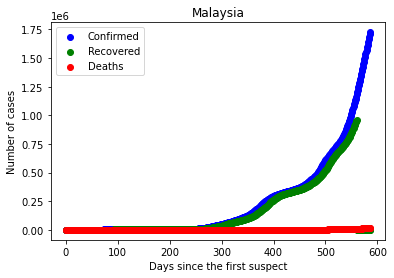

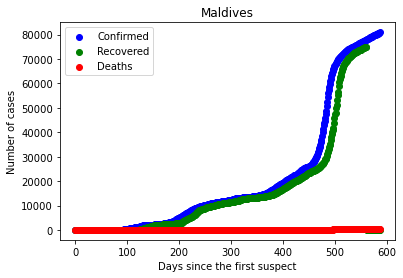

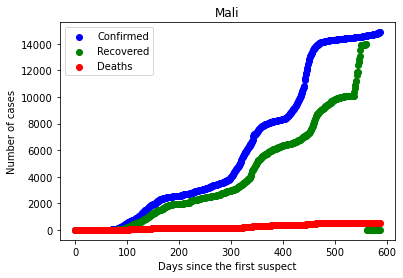

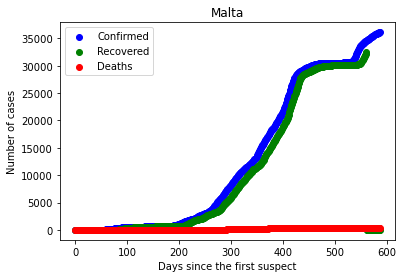

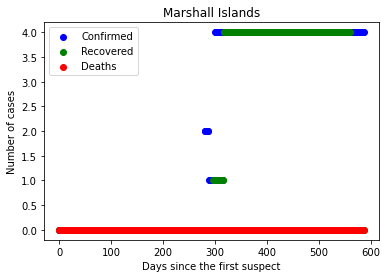

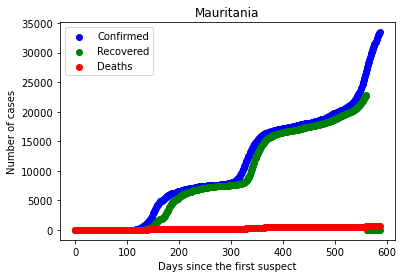

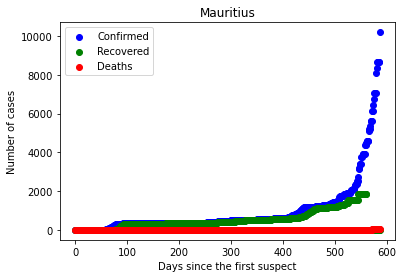

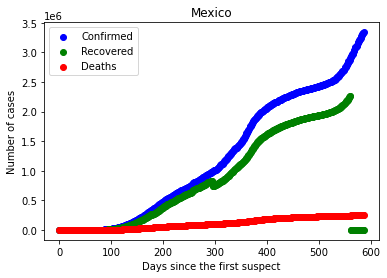

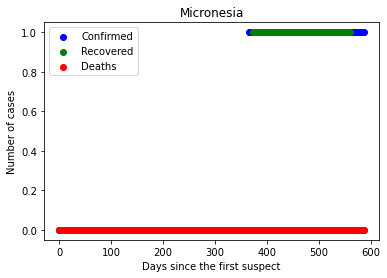

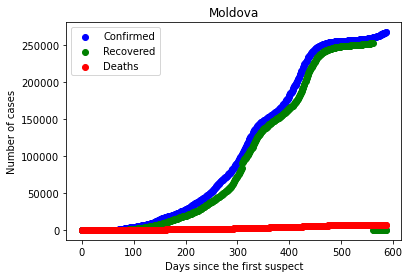

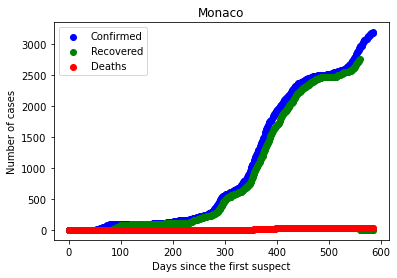

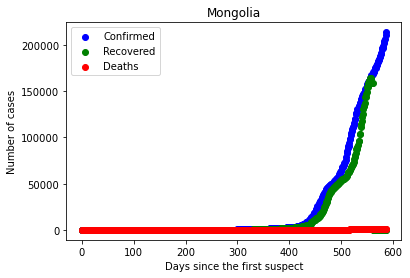

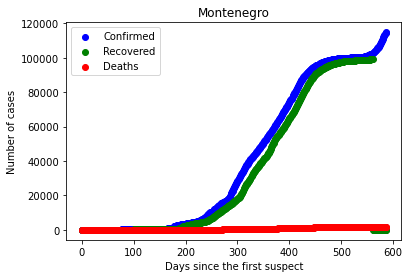

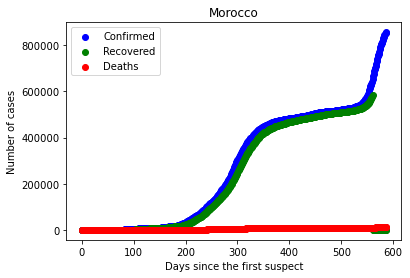

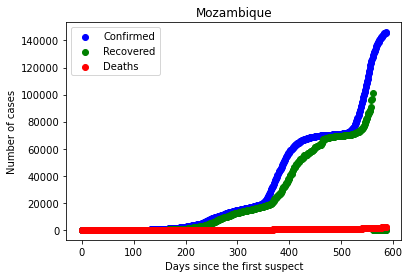

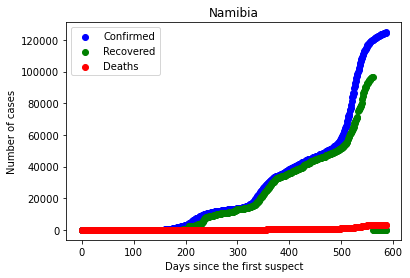

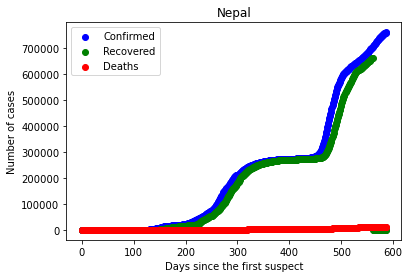

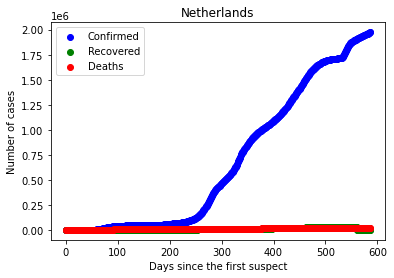

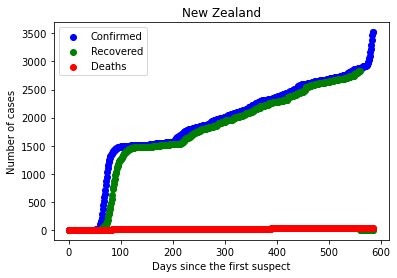

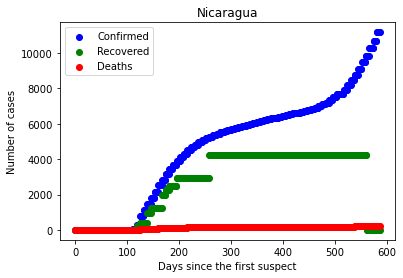

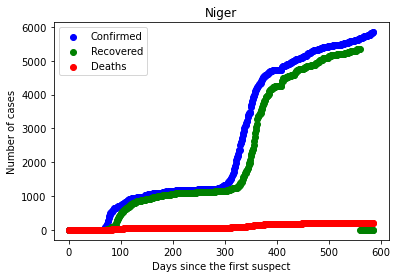

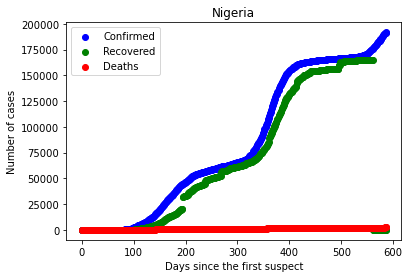

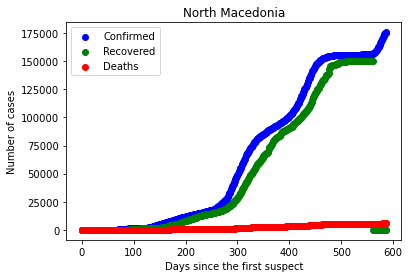

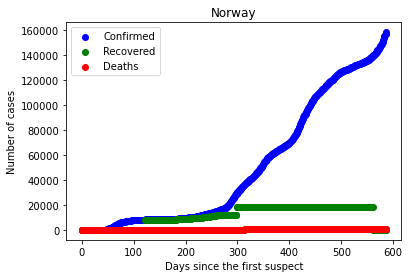

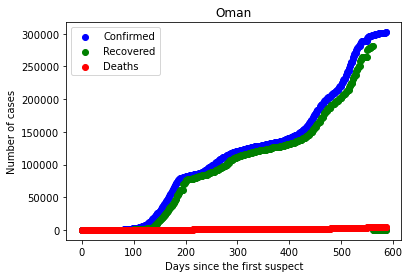

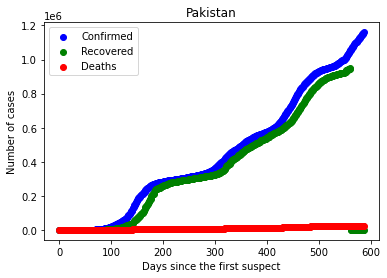

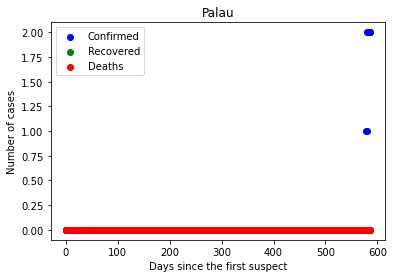

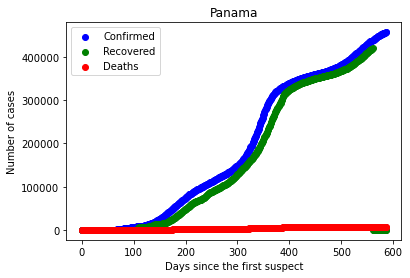

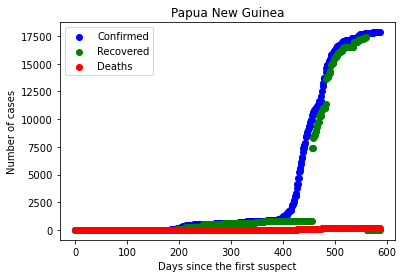

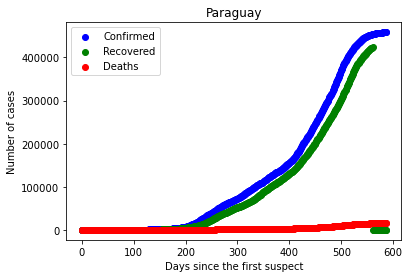

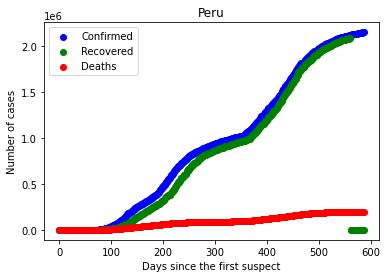

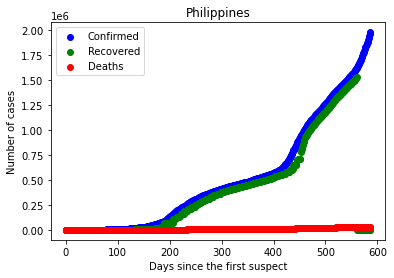

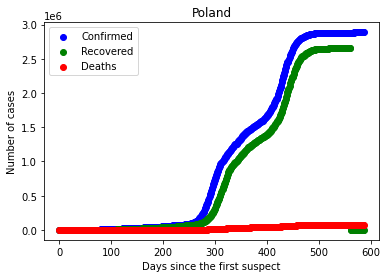

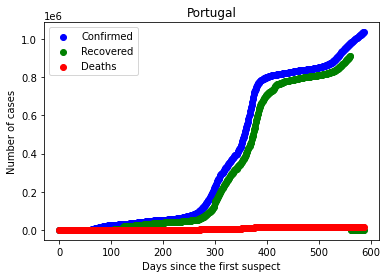

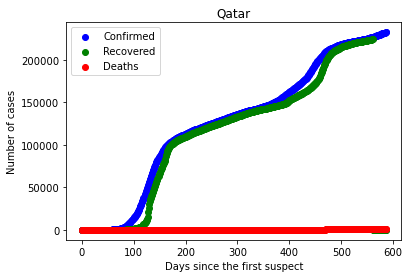

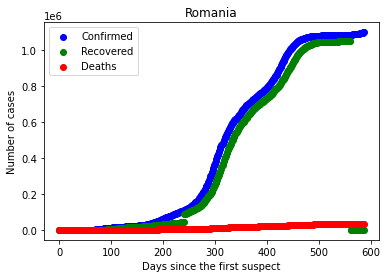

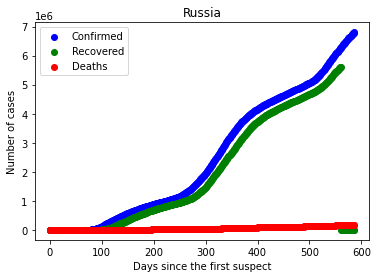

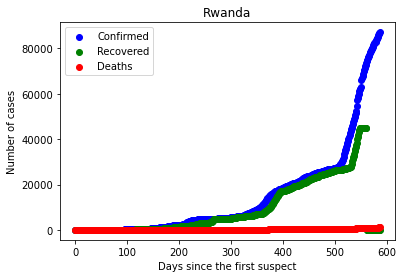

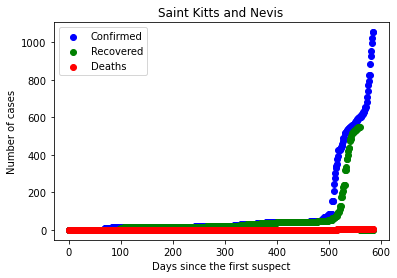

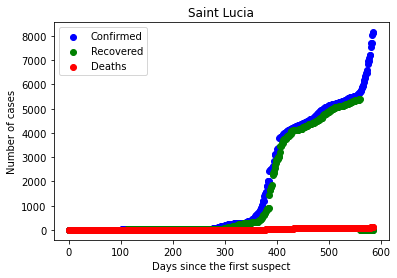

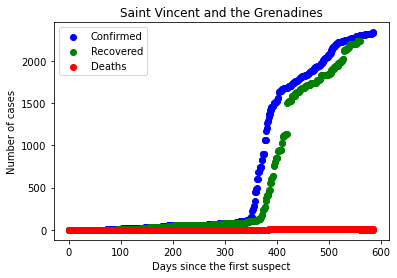

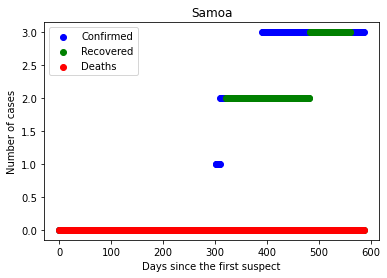

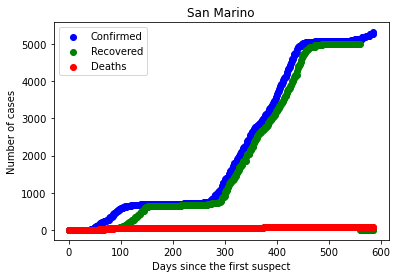

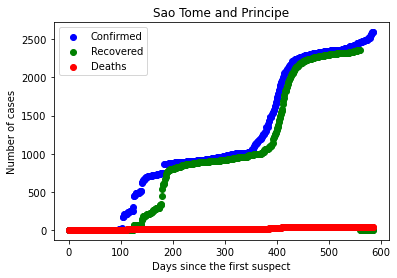

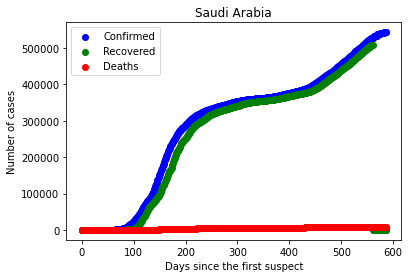

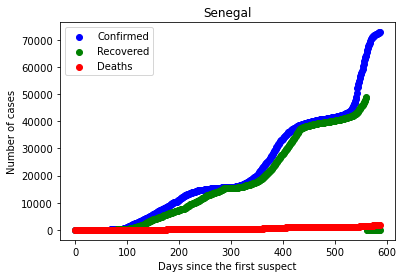

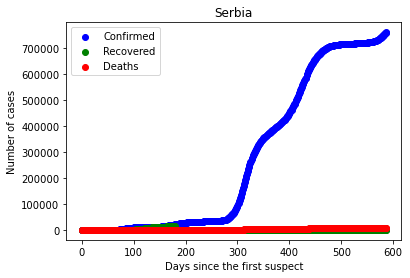

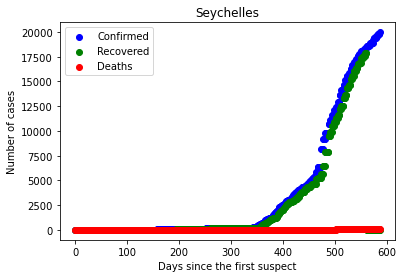

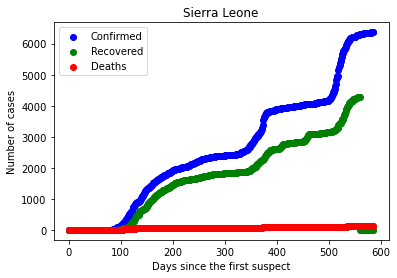

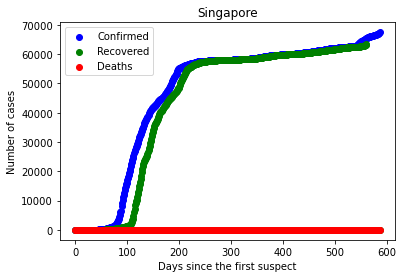

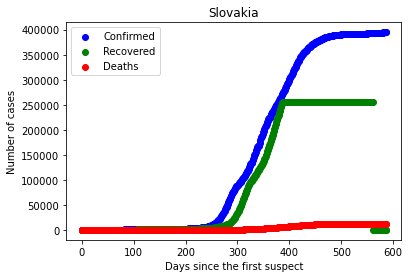

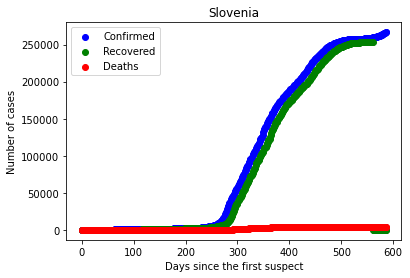

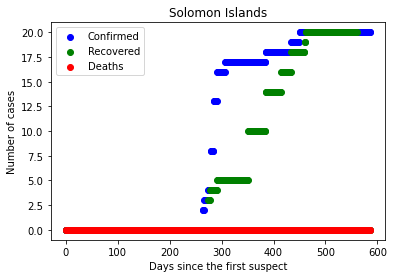

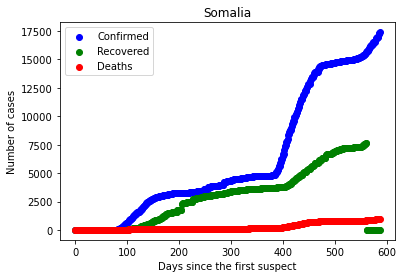

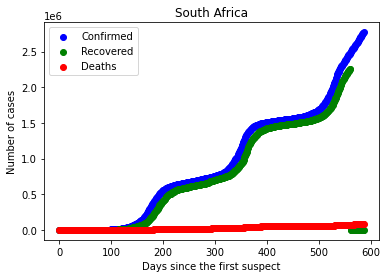

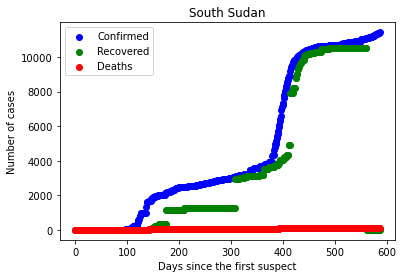

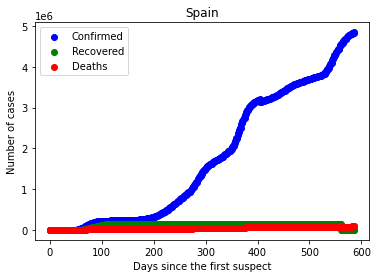

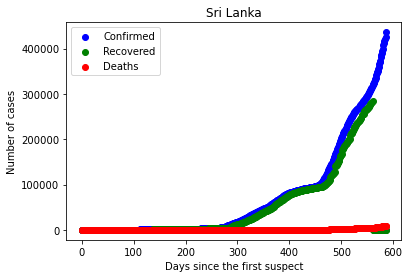

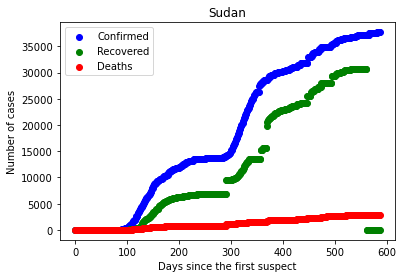

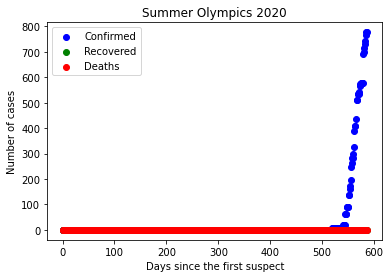

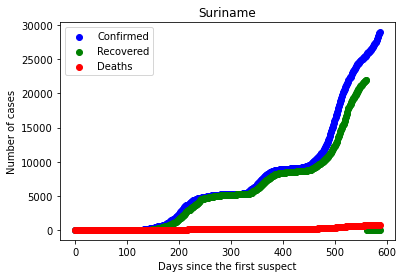

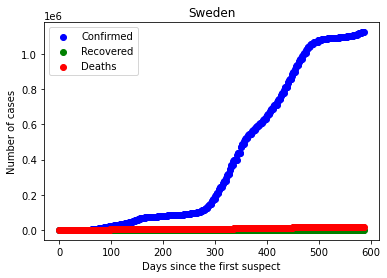

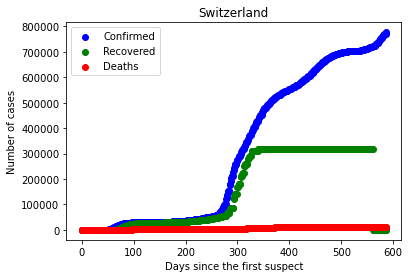

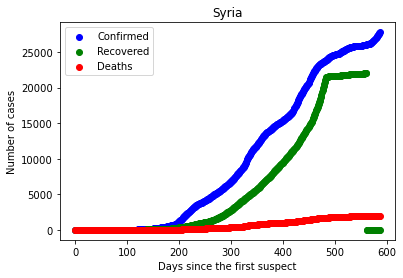

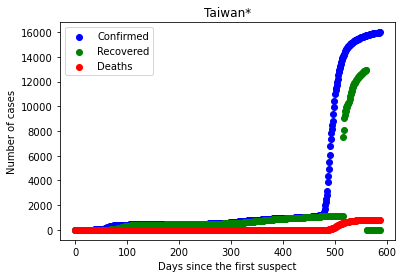

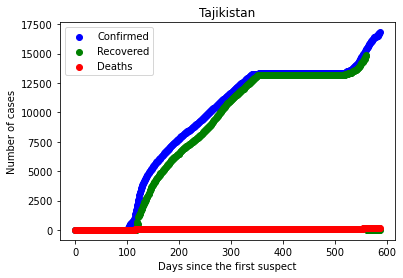

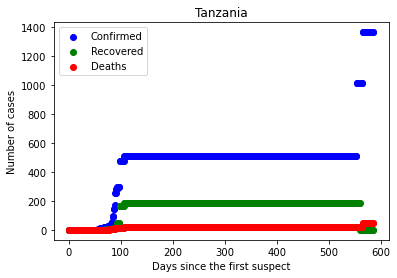

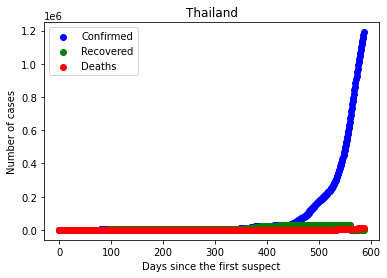

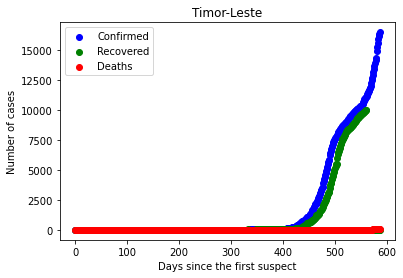

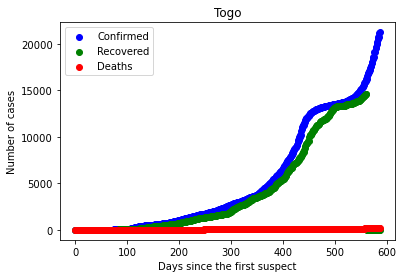

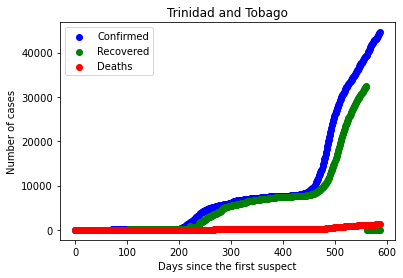

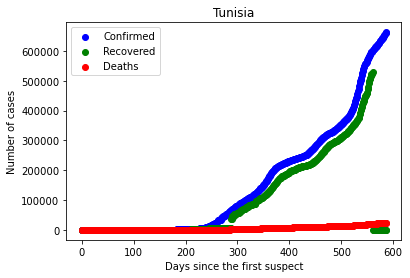

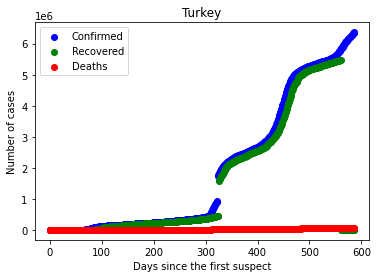

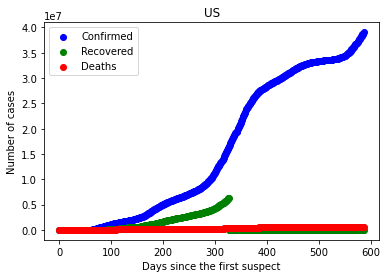

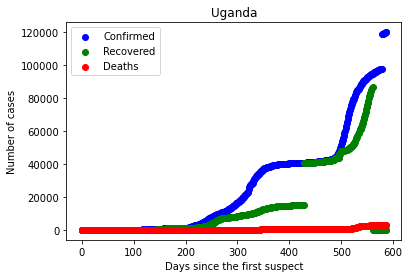

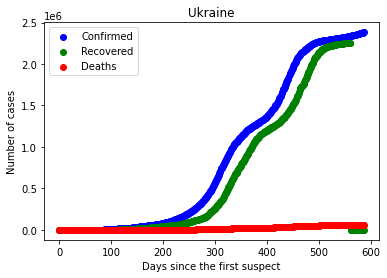

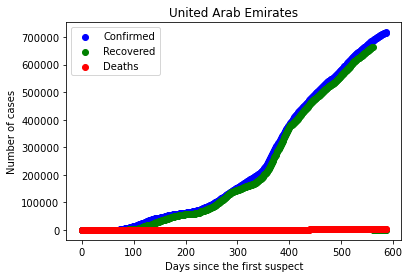

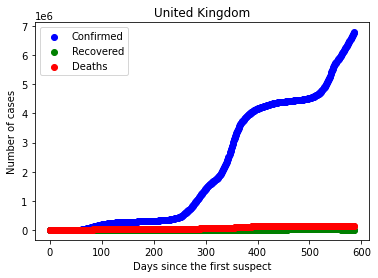

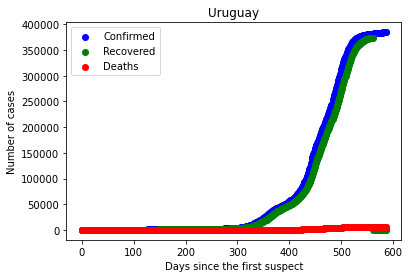

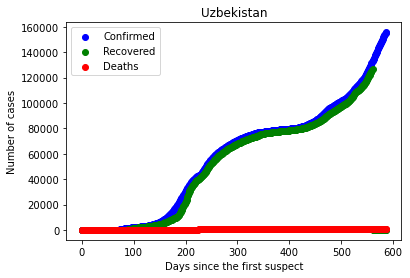

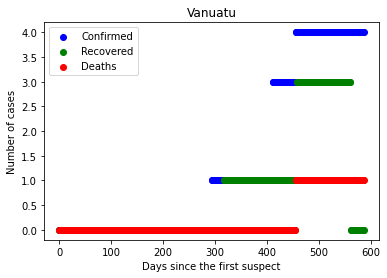

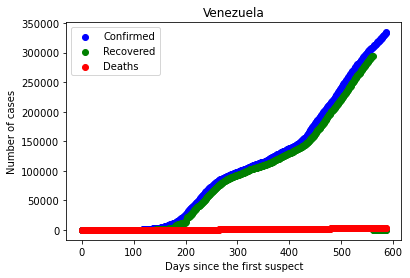

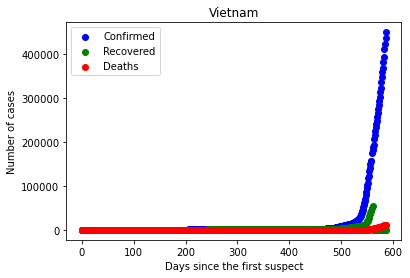

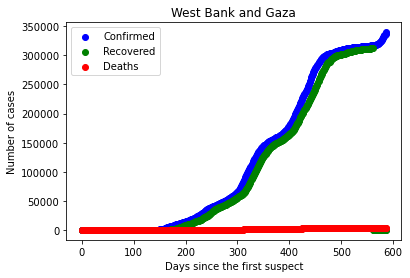

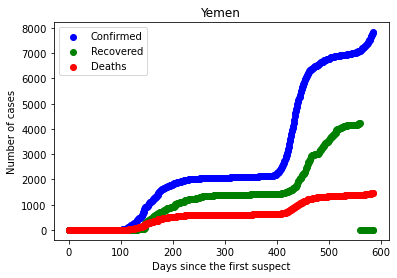

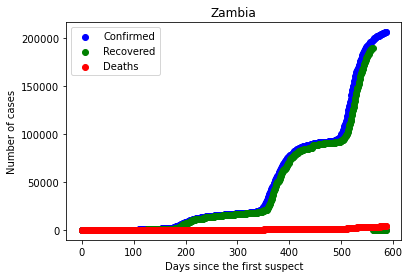

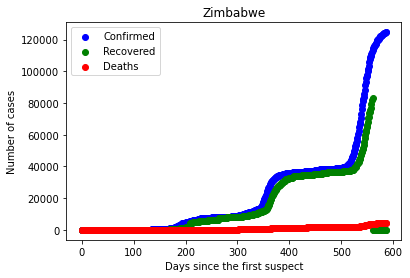

In [11]:
for idx in range(0,len(countries)):    
    C = df3[df3['Country']==countries[idx]].reset_index()        
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [12]:
df4 = df3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

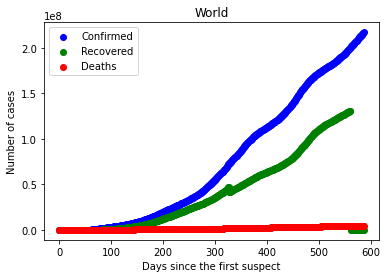

In [13]:
C = df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()